## Subtask 1: The Viola-Jones Object Detector
In this subtask, we only implement the code given. In our case we have re-writtten it in python.

Enter folder path (eg.'../images/'): ../images/
No objects found in dart5.jpg


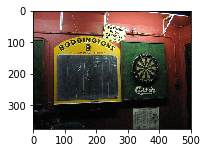

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import matplotlib.pylab as pylab
from os import listdir
from os.path import isfile, join

mypath = str(input("Enter folder path (eg.'../images/'): "))

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

pylab.rcParams['figure.figsize'] = (20,10)


def imshow(image):
    #OpenCV stores images in BGR so we have to convert to RGB to display it using matplotlib
    imagergb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(imagergb)
    
def imresize (image):
    hh, ww, dd = image.shape
    imscale = 500/ww
    newX, newY = image.shape[1]*imscale, image.shape[0]*imscale
    newimage = cv2.resize(image, (int(newX), int(newY)))
    return newimage

obj_classifier = cv2.CascadeClassifier('frontalface.xml')

fig = plt.figure()

#number of test images
N=len(onlyfiles)

for i in range (5,6):
    #load image
    location = mypath + onlyfiles[i]

    image = cv2.imread(location)
    image = imresize(image)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #run classifier
    obj = obj_classifier.detectMultiScale(gray, 1.1, 1, 0, (50,50), (500,500))

    #check if emppty
    if obj is ():
        print('No objects found in ' + str("dart") + str(i) + str(".jpg"))

    # Visualise classifier: Draw box by iteration
    for (x,y,w,h) in obj:
        cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 3)

    saveloc = (str("faceclassified/") + onlyfiles[i])
    cv2.imwrite(saveloc,image)
#     plot figures
    cols = 4
    rows = math.ceil(N/cols)
    ax = fig.add_subplot(rows, cols, i+1)
    imagergb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(imagergb)
# imshow(image)
#cv2.imwrite('detected.jpg', detected)
#cv2.destroyAllWindows()
